In [4]:
import numpy as np
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim

# Load the two images
img1 = img_as_float(io.imread("training_data/similar_photos/20230822_145151.jpg"))
img2 = img_as_float(io.imread("training_data/similar_photos/20230822_145155.jpg"))

# Calculate the SSIM value for each color channel
ssim_val_R = ssim(img1[:, :, 0], img2[:, :, 0], data_range=1)
ssim_val_G = ssim(img1[:, :, 1], img2[:, :, 1], data_range=1)
ssim_val_B = ssim(img1[:, :, 2], img2[:, :, 2], data_range=1)

# Take the average of the three SSIM values
ssim_val = (ssim_val_R + ssim_val_G + ssim_val_B) / 3

# Print the SSIM value
print("SSIM value:", ssim_val_B, ssim_val_G, ssim_val_R)

SSIM value: 0.34551888811559833 0.3522539374360502 0.34691854335013594


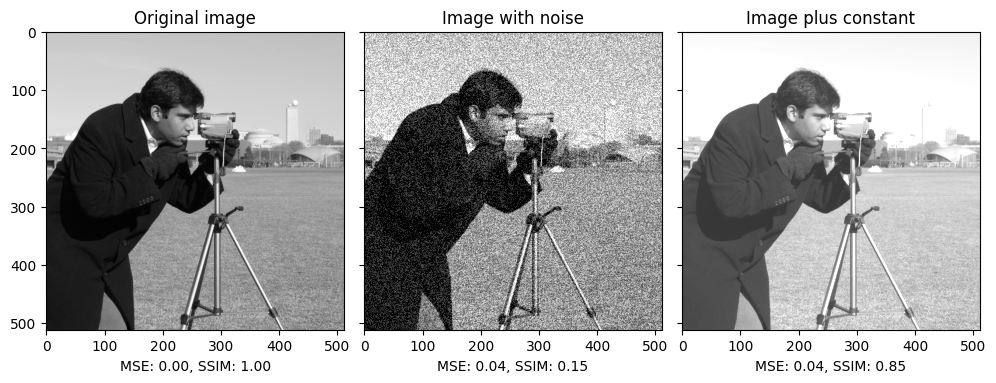

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error


img = img_as_float(data.camera())
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mean_squared_error(img, img_noise)
ssim_noise = ssim(img, img_noise, data_range=img_noise.max() - img_noise.min())

mse_const = mean_squared_error(img, img_const)
ssim_const = ssim(img, img_const, data_range=img_const.max() - img_const.min())

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f"MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}")
ax[0].set_title("Original image")

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f"MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}")
ax[1].set_title("Image with noise")

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(f"MSE: {mse_const:.2f}, SSIM: {ssim_const:.2f}")
ax[2].set_title("Image plus constant")

plt.tight_layout()
plt.show()

In [1]:
import torchvision
from PIL import Image

model = torchvision.models.vgg11(weights=torchvision.models.VGG11_Weights.DEFAULT)
print(model)

: 

: 

In [ ]:
image = torchvision.io.read_image("training_data/similar_photos/20230822_145151.jpg").float()
print(image)

tensor([[[208., 219., 232.,  ..., 149., 148., 147.],
         [222., 230., 238.,  ..., 147., 146., 146.],
         [232., 236., 239.,  ..., 140., 140., 141.],
         ...,
         [167., 167., 168.,  ..., 218., 220., 222.],
         [181., 181., 181.,  ..., 222., 225., 227.],
         [192., 192., 191.,  ..., 227., 230., 232.]],

        [[205., 216., 229.,  ..., 144., 143., 142.],
         [219., 227., 235.,  ..., 142., 141., 141.],
         [229., 233., 236.,  ..., 134., 134., 135.],
         ...,
         [130., 130., 131.,  ..., 188., 190., 192.],
         [144., 144., 144.,  ..., 192., 195., 197.],
         [155., 155., 154.,  ..., 197., 200., 202.]],

        [[198., 209., 222.,  ..., 114., 113., 112.],
         [212., 220., 228.,  ..., 113., 112., 112.],
         [222., 226., 229.,  ..., 108., 108., 109.],
         ...,
         [104., 104., 105.,  ..., 160., 162., 164.],
         [118., 118., 118.,  ..., 164., 167., 169.],
         [129., 129., 128.,  ..., 169., 172., 174.]]]

: 

: 

In [ ]:
features = model.features(image)